# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df.describe()

,date,age,income,transactions,spend
count,160,160.000000,155.000000,160.00000,157.000000
mean,2021-04-21 12:00:00,40.018750,41983.866323,3.23750,117.291592
min,2021-02-01 00:00:00,22.000000,17928.800000,0.00000,0.540000
25%,2021-03-12 18:00:00,34.700000,32471.530000,2.00000,77.250000
50%,2021-04-21 12:00:00,40.150000,39332.520000,3.00000,119.320000
75%,2021-05-31 06:00:00,44.925000,49697.690000,4.00000,153.340000
max,2021-07-10 00:00:00,61.100000,87052.400000,20.00000,280.050000
std,NaN,8.458676,13262.457038,2.58561,51.768645


In [6]:
df.isna().sum()

date            0
region          0
age             0
income          5
transactions    0
spend           3
dtype: int64

## 2) Numeric profile

In [7]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions (TODO: add at least 3)

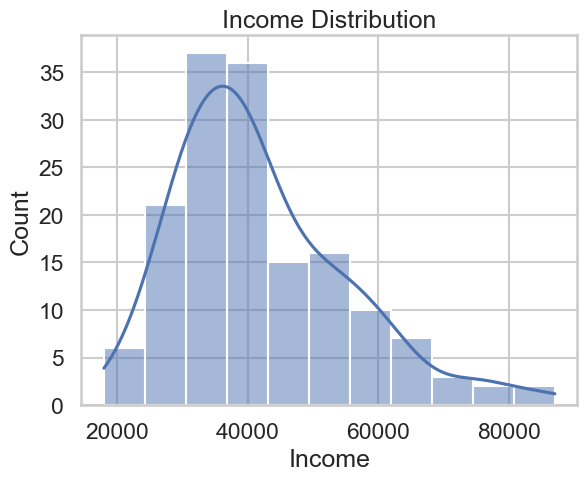

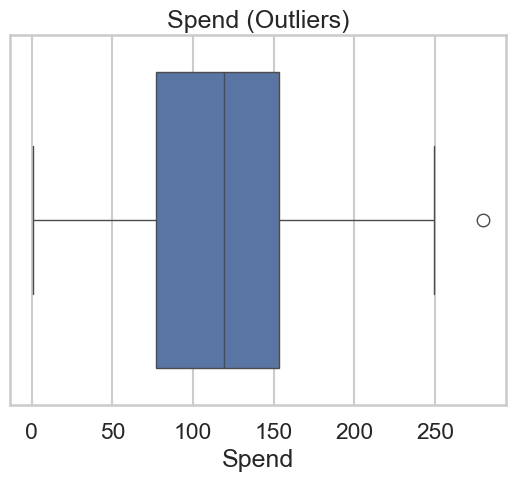

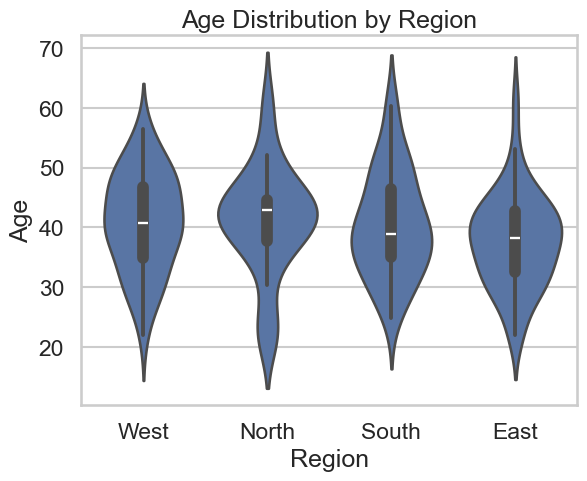

In [8]:
# 1. Histogram + KDE for 'income'
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()

# 2. Boxplot for 'spend' (outlier detection)
sns.boxplot(x=df['spend'])
plt.title('Spend (Outliers)')
plt.xlabel('Spend')
plt.show()

# 3. Violin plot for 'age' by region
sns.violinplot(x='region', y='age', data=df)
plt.title('Age Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Age')
plt.show()

## 4) Relationships (TODO: add at least 2)

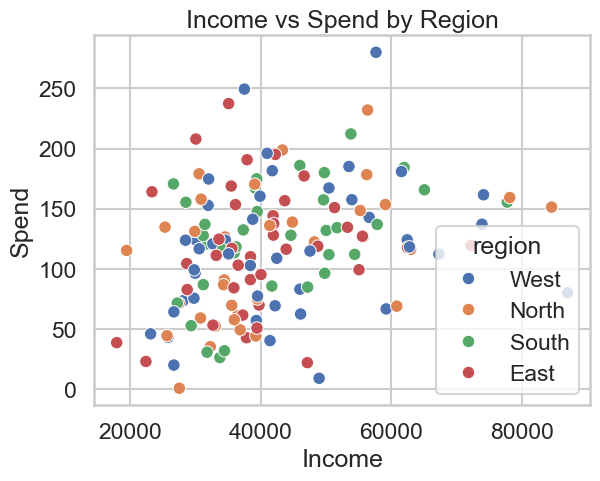

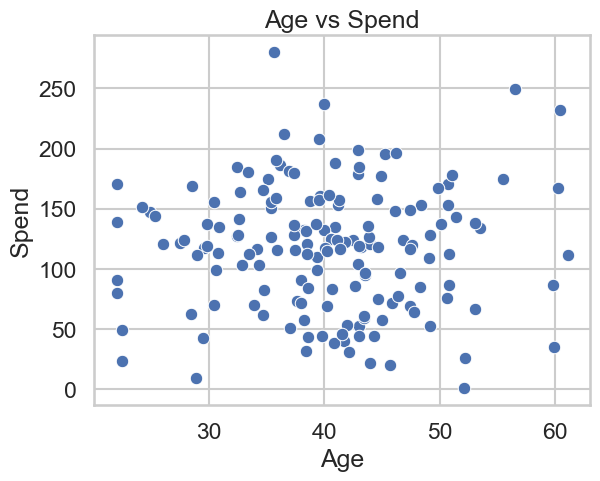

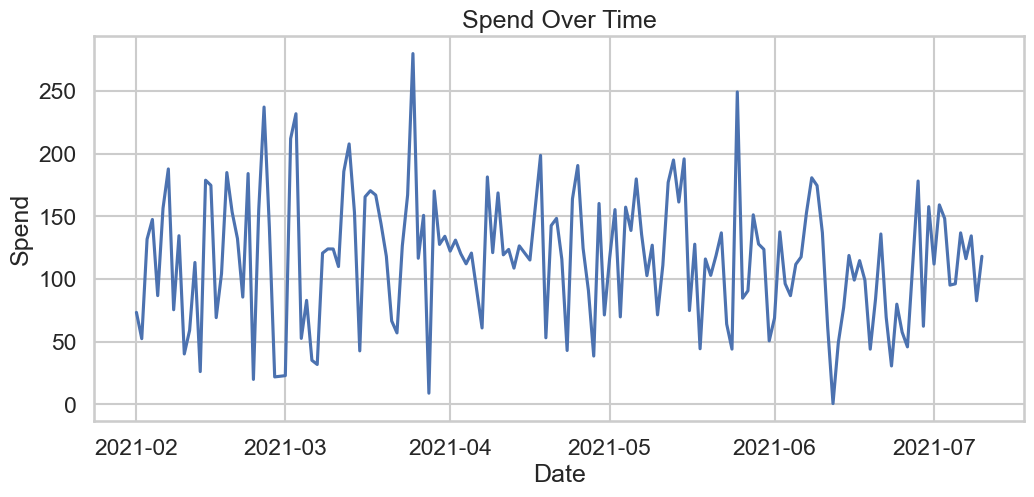

In [11]:
# 1. Scatterplot: income vs spend, colored by region
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend by Region')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.show()

# 2. Scatterplot: age vs spend
sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.xlabel('Age')
plt.ylabel('Spend')
plt.show()

# 3. Line plot: spend over time (seasonality/structure)
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='spend', data=df.sort_values('date'))
plt.title('Spend Over Time')
plt.xlabel('Date')
plt.ylabel('Spend')
plt.show()

## 5) (Optional) Correlation matrix

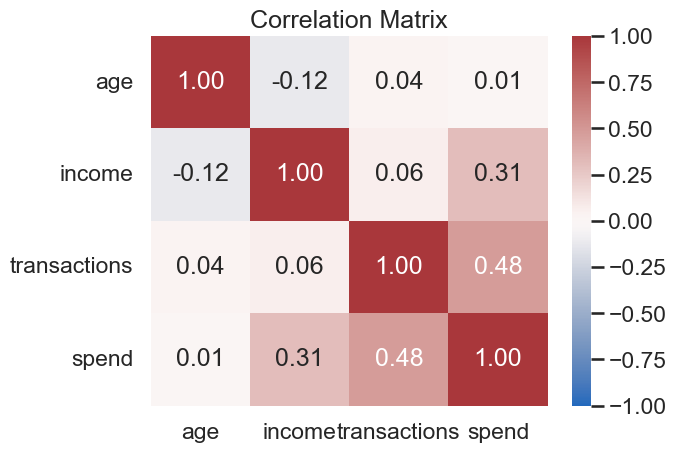

,age,income,transactions,spend
age,1.000000,-0.123160,0.037754,0.008174
income,-0.123160,1.000000,0.063573,0.307307
transactions,0.037754,0.063573,1.000000,0.480685
spend,0.008174,0.307307,0.480685,1.000000


In [10]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions

**Top 3 Insights:**
1. **Income and Spend are Positively Correlated:** The scatterplot and correlation matrix show a clear positive relationship between income and spend, suggesting higher earners tend to spend more.
2. **Outliers and Skew:** Both 'income' and 'spend' are right-skewed, as seen in the histograms and boxplots. There are several outliers in 'transactions' and 'spend', which may be rare events or data errors.
3. **Seasonality/Structure in Spend:** The line plot of 'spend' over time shows some fluctuations, but no strong seasonality is apparent in this synthetic data. However, there may be short-term trends or clusters of high/low spend.

**Assumptions & Risks:**
- The data is assumed to be representative of the population; if not, insights may not generalize.
- Missing values are assumed to be missing at random; if not, imputation or deletion could bias results.
- Outliers are assumed to be errors or rare events; removing them may hide important phenomena.
- The time series is assumed to be evenly spaced and complete; missing dates could affect trend analysis.

**Implications for Next Step:**
- Impute or remove missing values in 'income' and 'spend'.
- Consider capping or removing extreme outliers in 'transactions' and 'spend'.
- Engineer new features such as spend per transaction, income brackets, or rolling averages for spend.
- Encode categorical variables (e.g., region) for modeling.
- If seasonality or trends are detected in real data, consider time-based features or decomposition.